<a href="https://colab.research.google.com/github/smojumder018/SUPREME/blob/main/3.1%20CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolutional Neural Network with PyTorch
## 1. About Convolutional Neural Network

### Transition From Feedforward Neural Network


#### Basic Convolutional Neural Network
- Additional **convolution** and **pooling** layers **before feedforward neural network**
- Layer with a **linear function & non-linearity**: **Fully connected layer**




##2. MNIST Dataset
![](https://drive.google.com/uc?export=view&id=1Esgjfx-jfstlL0h1dlfBvcjGVGSFzMrw)

The MNIST dataset is a benchmark dataset used for training and testing image processing systems, especially in the field of machine learning and deep learning. It is particularly popular for testing classification algorithms. It is a collection of images of hand written numbers.

**Datasets:**

Set| Number of Images
---|---
Training|60,000
Testing|10,000

**Image Properties:**

*Image Size: 28 x 28 pixels

*Pixel Values: 0 (black) to 255 (white); typically normalized to [0, 1] for model input

*Color Format: Grayscale (1 channel)


## 3. Building a Convolutional Neural Network with PyTorch

### Model A:
- 2 Convolutional Layers
    - Same Padding (same output size)
- 2 Max Pooling Layers
- 1 Fully Connected Layer


### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- Step 3: Create Model Class
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

### Step 1: Loading MNIST Train Dataset
**Images from 1 to 9**

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [2]:
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

100%|██████████| 9.91M/9.91M [00:00<00:00, 12.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 339kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.71MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.30MB/s]


### Step 2: Make Dataset Iterable

In [3]:
batch_size = 100
n_iters = 3000
num_epochs = 5


train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


## Create Model Class


In [4]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()

        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()

        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)

        # Max pool 1
        out = self.maxpool1(out)

        # Convolution 2
        out = self.cnn2(out)
        out = self.relu2(out)

        # Max pool 2
        out = self.maxpool2(out)

        out = out.view(out.size(0), -1) #Converts [32, 7, 7] into a single vector of size 32×7×7 = 1568

        # Linear function (readout)
        out = self.fc1(out)

        return out

  Input: 1×28×28 grayscale image

$$
\text{Output Shape} = \left\lfloor \frac{\text{Input} - \text{Kernel} + 2 \times \text{Padding}}{\text{Stride}} \right\rfloor + 1
$$


  1. Conv2d Layer 1:
  nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2)

  Output shape: ((28 - 5 + 2×2)/1) + 1 = 28

  [batch, 16, 28, 28]

  Params: (1×5×5 + 1 bias) × 16 = 416

  2. ReLU:

  Output shape: [batch, 16, 28, 28]

  No params

  3. MaxPool2d:
  nn.MaxPool2d(kernel_size=2)

  Output shape: Takes max of 2x2 patches halving
  
  [batch, 16, 14, 14]

  No params

  4. Conv2d Layer 2:
  nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2)

  Output shape: ((14 - 5 + 2×2)/1) + 1 = 14
  
  [batch, 32, 14, 14]

  Params: (16×5×5 + 1 bias) × 32 = 12,832

  5. ReLU:

  Output shape: [batch, 32, 14, 14]

  No params

  6. MaxPool2d:

  Output shape: [batch, 32, 7, 7]

  No params

  7. Flatten:

  [32, 7, 7] → 1568

  8. Fully Connected Layer:
  nn.Linear(1568, 10)

  Output shape: [batch, 10]

  Params: 1568×10 + 10 = 15,690

### Step 4: Instantiate Model Class

In [5]:
from torchsummary import summary
model = CNNModel()
#Shows what the model looks like
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             416
              ReLU-2           [-1, 16, 28, 28]               0
         MaxPool2d-3           [-1, 16, 14, 14]               0
            Conv2d-4           [-1, 32, 14, 14]          12,832
              ReLU-5           [-1, 32, 14, 14]               0
         MaxPool2d-6             [-1, 32, 7, 7]               0
            Linear-7                   [-1, 10]          15,690
Total params: 28,938
Trainable params: 28,938
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.32
Params size (MB): 0.11
Estimated Total Size (MB): 0.44
----------------------------------------------------------------


### Step 5: Instantiate Loss Class

  1. nn.MSELoss (Mean Squared Error Loss)

  Use: Regression tasks  
  Equation:  
      MSE = (1/n) * Σ (yᵢ - ŷᵢ)²  


  2. nn.L1Loss (Mean Absolute Error Loss)

  Use: Regression with less sensitivity to outliers  
  Equation:  
      MAE = (1/n) * Σ |yᵢ - ŷᵢ|  


  3. nn.CrossEntropyLoss (Cross Entropy for Classification)

  Use: Multi-class classification (logits as output)  
  Equation:  
      CE = -Σ yᵢ * log(softmax(ŷᵢ))  


  4. nn.BCEWithLogitsLoss (Binary Cross Entropy with Logits)

  Use: Binary classification (outputs logits)  
  Equation:  
      BCE = -[y * log(σ(ŷ)) + (1 - y) * log(1 - σ(ŷ))]  
      where σ(ŷ) = sigmoid(ŷ)  


  5. nn.HuberLoss (Robust Regression)

  Use: Regression with robustness to outliers  
  Equation:  
      L₍δ₎(a) = ½ * a²    if |a| ≤ δ  
              δ * (|a| - ½δ) otherwise  
      where a = y - ŷ  


  6. nn.SmoothL1Loss (Smooth between L1 and L2)

  Use: Regression (alternative to MSE/L1)  
  Equation:  
      Like Huber with δ = 1  


  7. nn.KLDivLoss (Kullback-Leibler Divergence)

  Use: Comparing probability distributions  
  Equation:  
      KL(P || Q) = Σ P(i) * log(P(i) / Q(i))  



    
   

In [6]:
criterion = nn.CrossEntropyLoss()

### Step 6: Instantiate Optimizer Class


  1. optim.SGD (Stochastic Gradient Descent)

  Use: Basic optimizer with optional momentum  
  Update Rule:  
      θ = θ - lr * ∇L(θ)  
  With momentum:  
      v = μ * v - lr * ∇L(θ)  
      θ = θ + v  
  PyTorch:  
      optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

  2. optim.Adam (Adaptive Moment Estimation)

  Use: Most common; good default choice  
  Update Rule:  
      mₜ = β₁ * mₜ₋₁ + (1 - β₁) * gₜ  
      vₜ = β₂ * vₜ₋₁ + (1 - β₂) * gₜ²  
      m̂ₜ = mₜ / (1 - β₁ᵗ), v̂ₜ = vₜ / (1 - β₂ᵗ)  
      θ = θ - lr * m̂ₜ / (√v̂ₜ + ε)  
  PyTorch:  
      optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

  3. optim.AdamW (Adam with Weight Decay)

  Use: Better regularization than L2 in Adam  
  Same update rule as Adam but decouples weight decay  
  PyTorch:  
      optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)

  4. optim.RMSprop

  Use: For non-stationary objectives or RNNs  
  Update Rule:  
      vₜ = α * vₜ₋₁ + (1 - α) * gₜ²  
      θ = θ - lr * gₜ / (√vₜ + ε)  
  PyTorch:  
      optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001, alpha=0.99)

  5. optim.Adagrad

  Use: Sparse data, adapts learning rate per parameter  
  Update Rule:  
      Gₜ = Gₜ₋₁ + gₜ²  
      θ = θ - lr * gₜ / (√Gₜ + ε)  
  PyTorch:  
      optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01)




In [7]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Parameters In-Depth

### Step 7: Train Model
- Process
    1. **Convert inputs/labels to variables**
        - CNN Input: (1, 28, 28)
        - Feedforward NN Input: (1, 28*28)
    2. Clear gradient buffets
    3. Get output given inputs
    4. Get loss
    5. Get gradients w.r.t. parameters
    6. Update parameters using gradients
        - `parameters = parameters - learning_rate * parameters_gradients`
    7. REPEAT

In [8]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.requires_grad_()

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:

                images = images.requires_grad_()
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)

                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))


Iteration: 500. Loss: 0.457778662443161. Accuracy: 90.08999633789062
Iteration: 1000. Loss: 0.3076566755771637. Accuracy: 93.08999633789062
Iteration: 1500. Loss: 0.17826765775680542. Accuracy: 94.30000305175781
Iteration: 2000. Loss: 0.18221516907215118. Accuracy: 95.47000122070312
Iteration: 2500. Loss: 0.1633397340774536. Accuracy: 96.1500015258789
Iteration: 3000. Loss: 0.13475945591926575. Accuracy: 96.4800033569336


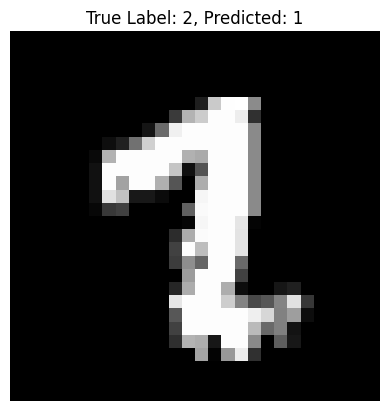

In [14]:
import random
import matplotlib.pyplot as plt


rand_index = random.randint(0, len(test_dataset) - 1)
image, label = test_dataset[rand_index]

# Prepare image for the model (add batch dimension)
input_image = image.unsqueeze(0)

model.eval()

# Predict
with torch.no_grad():
    output = model(input_image)
    _, predicted = torch.max(output.data, 1)

# Show the image and prediction
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"True Label: {label}, Predicted: {predicted.item()}")
plt.axis('off')
plt.show()


### Model B:
- 2 Convolutional Layers
    - Same Padding (same output size)
- 2 **Average Pooling** Layers
- 1 Fully Connected Layer
<img src="./images/cnn10-3.png" alt="deeplearningwizard" style="width: 900px;"/>
<img src="./images/cnn10-4.png" alt="deeplearningwizard" style="width: 900px;"/>

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- Step 3: Create Model Class
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

In [10]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()

        # Average pool 1
        self.avgpool1 = nn.AvgPool2d(kernel_size=2)

        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()

        # Average pool 2
        self.avgpool2 = nn.AvgPool2d(kernel_size=2)

        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)

        # Average pool 1
        out = self.avgpool1(out)

        # Convolution 2
        out = self.cnn2(out)
        out = self.relu2(out)

        # Max pool 2
        out = self.avgpool2(out)

        # Resize
        # Original size: (100, 32, 7, 7)
        # out.size(0): 100
        # New out size: (100, 32*7*7)
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)

        return out

'''
STEP 4: INSTANTIATE MODEL CLASS
'''
from torchsummary import summary
model = CNNModel()

#Shows what the model looks like
summary(model, input_size=(1, 28, 28))
'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = images.requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total


            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             416
              ReLU-2           [-1, 16, 28, 28]               0
         AvgPool2d-3           [-1, 16, 14, 14]               0
            Conv2d-4           [-1, 32, 14, 14]          12,832
              ReLU-5           [-1, 32, 14, 14]               0
         AvgPool2d-6             [-1, 32, 7, 7]               0
            Linear-7                   [-1, 10]          15,690
Total params: 28,938
Trainable params: 28,938
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.32
Params size (MB): 0.11
Estimated Total Size (MB): 0.44
----------------------------------------------------------------
Iteration: 500. Loss: 0.6161680221557617. Accuracy: 85.72000122070312
Iteration: 1000. Loss: 0.4195305109024

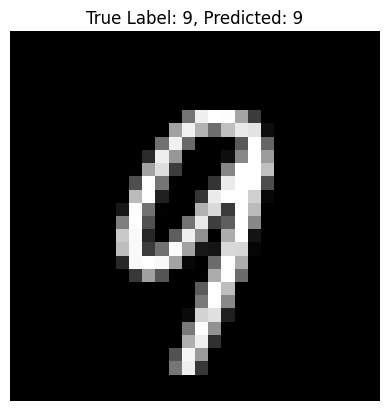

In [11]:
import random
import matplotlib.pyplot as plt

# Pick a random index from the test dataset
rand_index = random.randint(0, len(test_dataset) - 1)
image, label = test_dataset[rand_index]

# Prepare image for the model (add batch dimension)
input_image = image.unsqueeze(0)

# Set model to evaluation mode
model.eval()

# Predict
with torch.no_grad():
    output = model(input_image)
    _, predicted = torch.max(output.data, 1)

# Show the image and prediction
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"True Label: {label}, Predicted: {predicted.item()}")
plt.axis('off')
plt.show()


### Average Pooling Test Accuracy < Max Pooling Test Accuracy

### Model C:
- 2 Convolutional Layers
    - **Valid Padding** (smaller output size)
- 2 **Max Pooling** Layers
- 1 Fully Connected Layer
<img src="./images/cnn10-5.png" alt="deeplearningwizard" style="width: 900px;"/>
<img src="./images/cnn10-6n.png" alt="deeplearningwizard" style="width: 900px;"/>

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- Step 3: Create Model Class
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

In [12]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()

        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()

        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(32 * 4 * 4, 10)

    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)

        # Max pool 1
        out = self.maxpool1(out)

        # Convolution 2
        out = self.cnn2(out)
        out = self.relu2(out)

        # Max pool 2
        out = self.maxpool2(out)

        # Resize
        # Original size: (100, 32, 7, 7)
        # out.size(0): 100
        # New out size: (100, 32*7*7)
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)

        return out

'''
STEP 4: INSTANTIATE MODEL CLASS
'''

from torchsummary import summary
model = CNNModel()

#Shows what the model looks like
summary(model, input_size=(1, 28, 28))

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = images.requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 24, 24]             416
              ReLU-2           [-1, 16, 24, 24]               0
         MaxPool2d-3           [-1, 16, 12, 12]               0
            Conv2d-4             [-1, 32, 8, 8]          12,832
              ReLU-5             [-1, 32, 8, 8]               0
         MaxPool2d-6             [-1, 32, 4, 4]               0
            Linear-7                   [-1, 10]           5,130
Total params: 18,378
Trainable params: 18,378
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.19
Params size (MB): 0.07
Estimated Total Size (MB): 0.27
----------------------------------------------------------------
Iteration: 500. Loss: 0.3374074697494507. Accuracy: 88.56999969482422
Iteration: 1000. Loss: 0.2915293872356

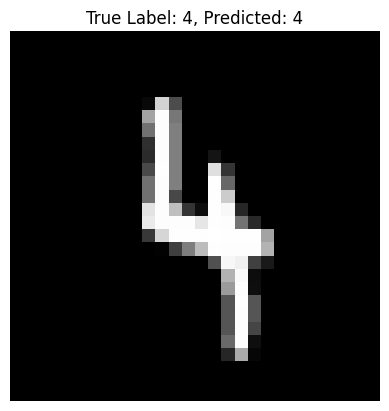

In [13]:
import random
import matplotlib.pyplot as plt

# Pick a random index from the test dataset
rand_index = random.randint(0, len(test_dataset) - 1)
image, label = test_dataset[rand_index]

# Prepare image for the model (add batch dimension)
input_image = image.unsqueeze(0)

# Set model to evaluation mode
model.eval()

# Predict
with torch.no_grad():
    output = model(input_image)
    _, predicted = torch.max(output.data, 1)

# Show the image and prediction
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"True Label: {label}, Predicted: {predicted.item()}")
plt.axis('off')
plt.show()


### Summary of Results



Model A | Model B | Model C
------------|--------- |------------------
Max Pooling      | Average Pooling       |Average Pooling  
Same Padding | Same Padding | Valid Padding
97.04% | 93.59% | 96.5%

| All Models |
|------|
| INPUT $\rightarrow$ CONV $\rightarrow$ POOL $\rightarrow$ CONV $\rightarrow$ POOL $\rightarrow$ FC |
| Convolution Kernel Size = 5 x 5 |
| Convolution Kernel Stride = 1 |
| Pooling Kernel Size = 2 x 2 |




### Deep Learning
- 3 ways to expand a convolutional neural network
    - More convolutional layers
    - Less aggressive downsampling
        - Smaller kernel size for pooling (gradually downsampling)
    - More fully connected layers
- Cons
    - Need a larger dataset
        - Curse of dimensionality
    - Does not necessarily mean higher accuracy

# Summary

- Transition from **Feedforward Neural Network**
    - Addition of **Convolutional** & **Pooling** Layers before Linear Layers
- One **Convolutional** Layer Basics
- One **Pooling** Layer Basics
    - Max pooling
    - Average pooling
- **Padding **
- **Output Dimension** Calculations and Examples
    -  $$ O = \frac {W - K + 2P}{S} + 1$$
- Convolutional Neural Networks
    - **Model A**: 2 Conv + 2 Max pool + 1 FC
        - Same Padding
    - **Model B**: 2 Conv + 2 Average pool + 1 FC
        - Same Padding
    - **Model C**: 2 Conv + 2 Max pool + 1 FC
        - Valid Padding

- Ways to Expand Model’s **Capacity**
    - More convolutions
    - Gradual pooling
    - More fully connected layers
